In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
server_data = pd.read_csv('server_log_data.csv')
server_data_encoded = pd.read_csv('server_log_data.csv')

# Explore the dataset
print(server_data.head())

            Event Time    IP Address Method  \
0  2023-11-06 00:00:02  172.26.3.214    GET   
1  2023-11-06 00:00:03  172.26.3.200    GET   
2  2023-11-06 00:00:03  172.26.3.200    GET   
3  2023-11-06 00:00:04  172.26.3.200    GET   
4  2023-11-06 00:01:02  172.26.3.214    GET   

                                                Path  Protocol  Status Code  \
0  /scan_m/cas_userstats/getUserStats.php?sdate=2...  HTTP/1.1        200.0   
1                                               /rbi  HTTP/1.1        301.0   
2                                              /rbi/  HTTP/1.1        200.0   
3                                              /rbi/  HTTP/1.1        200.0   
4  /scan_m/cas_userstats/getUserStats.php?sdate=2...  HTTP/1.1        200.0   

   Response Size                                         User Agent  
0           93.0  python-requests/2.5.1 CPython/3.8.5 Linux/3.10...  
1          248.0                                  Python-urllib/3.7  
2         9298.0                

In [7]:
server_data["Status Code"].unique()

array([200., 301., 302., 404., 400., 403., 431., 417., 405., 206.,  nan])

In [9]:
server_data = server_data.dropna()
server_data_encoded = server_data_encoded.dropna()

In [10]:
# Select relevant features
features = server_data_encoded[['Status Code', 'Response Size']]

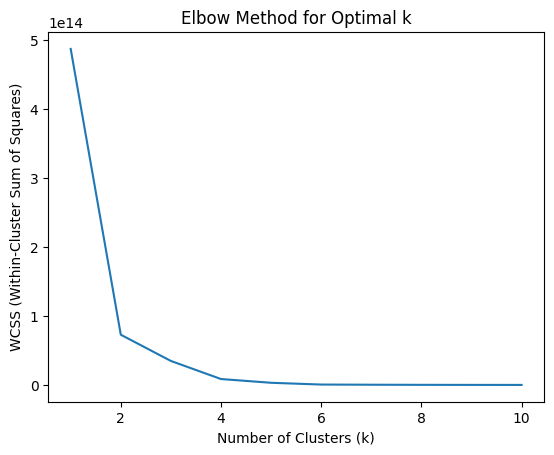

In [11]:
# Use the elbow method to find the optimal number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [16]:
# Apply K-means clustering
k = 3  # replace with the optimal number
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features)

# Add cluster labels to the original dataframe
server_data['Cluster'] = cluster_labels

In [17]:
server_data['Cluster'].unique()

array([0, 2, 1], dtype=int32)

In [18]:
csv_file_path = 'server_data_with_clusters.csv'

# Save the DataFrame to a CSV file
server_data.to_csv(csv_file_path, index=False)

print(f"DataFrame with clusters saved to: {csv_file_path}")

DataFrame with clusters saved to: server_data_with_clusters.csv
